# TEST ESTADÍSTICOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import kurtosistest
from scipy.stats import kstest

/home/sanfermen/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Cargamos el archivo sin outliers
df = pd.read_csv("../ficheros/diamons_01.csv",index_col =0)

**¿Qué diferencia existe el error de tipo I y el error de tipo II?**

- El error de tipo 1 Es que rechazamos la hipotesis nula (H0) cuando es verdadera

- El error de tipo 2 Es que aceptamos la hipotesis nula (H0) siendo falsa
 
 Por ejemplo:
- H0 test de embarazo dice que no estás embarazada

    - El error tipo 1 es que el test te dice que sí cuando no lo estás 
    
    - El error de tipo 2 el test dice que no estás embarazada y en realidad sí lo estás.


**¿Qué es la asimetría?**
 
 - Que los datos no estan igual distribuidos respecto a la media.

**¿Es vuestra variable respuesta asimétrica?**

In [3]:
df["price"].skew()

1.1897496273688166

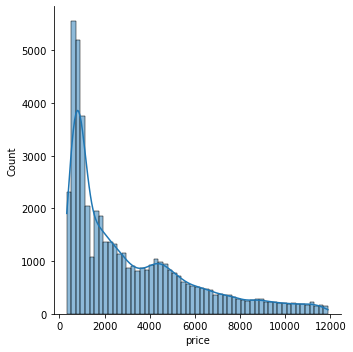

In [4]:
sns.displot(df["price"], kde = True);

Tras hacer el sesgo y la gráfica, podemos ver que, es una distribución asimetrica positiva, la media será  mayor que la mediana y la moda por lo tanto los datos no son normales.

**¿Qué tipo de curtosis presenta vuestra variable respuesta?**


In [5]:
kurtosistest(df["price"])

KurtosistestResult(statistic=22.149057992335813, pvalue=1.0652298890848107e-108)

Al ser el coficiente de Kurtosis mayor que cero, vemos que es leptocúrtica. Visualmente se ve perfectamente que tiene una morfología afilada.

El p-valor del test es < que 0.05, esto nos indica que podemos rechazar la H0 por lo que los datos no son normales

**¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.**

In [6]:
# Realizamos el test de Kolmogorov ya que nuestra muestra es mayor de 5000
kstest(df["price"],"norm")

KstestResult(statistic=1.0, pvalue=0.0)

Según la gráfica (realizada más arriba) y los resultados obtenidos en el test kolmogorov-Smimov podemos concluir que los datos no son normales y podemos rechazar la H0 (p-valor <0.05)